# Solutions Mock Midterm Question 4

We have the equation $y'=F(x,y(x))=-2y(x)$.
For the implicit RK, this means that
$$k_1 = F(x+0.211h, y+0.25hk_1-0.039hk_2)=-2y-0.5hk_1+0.078hk_2$$
$$k_2 = F(x+0.789h, y+0.539k_1+0.25k_2)=-2y-1.048hk_1-0.5hk_2$$

## a)

In [1]:
def rk(x, y, h=.25):
    k1 = -2 * y * (1/(0.078*h) + 2/(h+2)) / ((h + 2)/(0.156 * h) + 2.096 * h / (h+2))
    k2 = -4 * y / (h + 2) - (2.096 * h) / (h+2) * k1
    return y+1/2*h*(k1+k2)

In [2]:
import numpy as np
xs = list(np.arange(-1, 1.1, .25))
ys = [1]
for x, y in zip(xs, ys):
    ys.append(rk(x, y))

# b)

In [3]:
import matplotlib.pyplot as plt

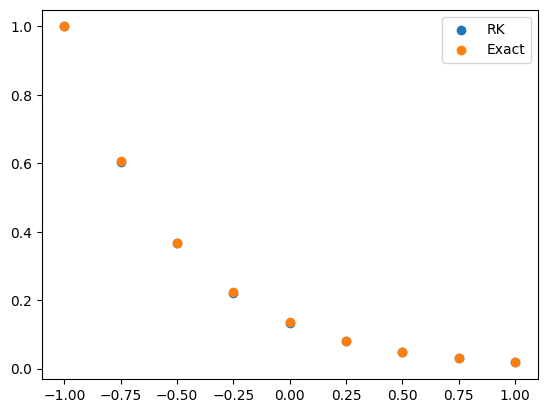

In [7]:
ys_exact = [np.exp(-2*x-2) for x in xs]
plt.scatter(xs, ys[:-1], label="RK");
plt.scatter(xs, ys_exact, label="Exact");
plt.legend();

## c)

In [8]:
def r(aa, bs, cs, x):
    unit_m = np.eye(len(aa), dtype=np.float32)
    unit_v = np.array([1 for _ in range(len(aa))], dtype=np.float32)
    return 1 + x * np.einsum('i,ij,j', bs, np.linalg.inv(unit_m - x*aa), unit_v)

In [9]:
as_1 = np.array([[.25,-.039], [.539, .25]])
bs_1 = np.array([1/2, 1/2])
cs_1 = np.array([.211, .789])
r(as_1, bs_1, cs_1, -.5)

0.6065719016406148

In [10]:
as_2 = np.array([[0,0], [1, 0]])
bs_2 = np.array([1/2, 1/2])
cs_2 = np.array([0., 1.])
r(as_2, bs_2, cs_2, -.5)

0.625